In [12]:
import jittor as jt
import numpy as np
jt.flags.use_cuda = True

[SYNC][i 1226 10:20:13.500076 52 cuda_flags.cc:25] CUDA enabled.


## Define a Simple Model

In [13]:
class Model(jt.Module):
    def __init__(self):
        self.layer1 = jt.nn.Linear(1, 10)
        self.relu = jt.nn.Relu() 
        self.layer2 = jt.nn.Linear(10, 1)
    def execute (self,x) :
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

def get_data(n): # generate random data for training test.
    for i in range(n):
        x = np.random.rand(batch_size, 1)
        y = x*x
        yield jt.float32(x), jt.float32(y)

## Training

In [14]:
import time

learning_rate = 0.01
batch_size = 50
n = 1000

model = Model()
optim = jt.nn.Adam(model.parameters(), learning_rate)
begin = time.time()

for i,(x,y) in enumerate(get_data(n)):
    pred_y = model(x)
    dy = pred_y - y
    loss = dy * dy
    loss_mean = loss.mean()
    optim.step(loss_mean)
    print(f"step {i}, loss = {loss_mean.data.sum()}")
end = time.time()

step 0, loss = 0.12343169003725052
step 1, loss = 0.09728299081325531
step 2, loss = 0.07804940640926361
step 3, loss = 0.07337296009063721
step 4, loss = 0.0814935639500618
step 5, loss = 0.07479465752840042
step 6, loss = 0.08906663209199905
step 7, loss = 0.08787931501865387
step 8, loss = 0.06506746262311935
step 9, loss = 0.07722386717796326
step 10, loss = 0.06800637394189835
step 11, loss = 0.0701238214969635
step 12, loss = 0.0349930115044117
step 13, loss = 0.05284535884857178
step 14, loss = 0.04084266722202301
step 15, loss = 0.0435093492269516
step 16, loss = 0.04032568633556366
step 17, loss = 0.04160361737012863
step 18, loss = 0.03119817189872265
step 19, loss = 0.028158793225884438
step 20, loss = 0.025464387610554695
step 21, loss = 0.03968729451298714
step 22, loss = 0.026950113475322723
step 23, loss = 0.02541627362370491
step 24, loss = 0.020417753607034683
step 25, loss = 0.0146144088357687
step 26, loss = 0.020323947072029114
step 27, loss = 0.016361216083168983
s

In [11]:
print(end - begin, "s has passed.")

0.8518223762512207 s has passed.


## Prediction

In [15]:
x = np.arange(0, 1, 0.01).reshape(-1, 1)
y = x ** 2
pred_y = model(jt.float32(x)).data

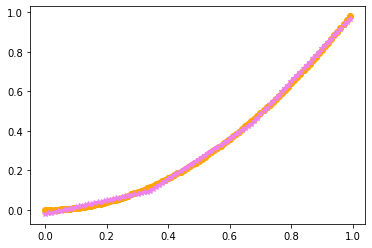

In [16]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', color='orange')
plt.plot(x, pred_y, '*', color='violet')
plt.show()

## Test the same model with pytorch

In [11]:
import torch

In [12]:
class torchModel(torch.nn.Module):
    def __init__(self):
        super(torchModel, self).__init__()
        self.layer1 = torch.nn.Linear(1, 10)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(10, 1)
    def forward(self, x) :
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
def get_torch_data(n): # generate random data for training test.
    for i in range(n):
        x = np.random.random((batch_size, 1))
        x = x.astype('float32')
        y = x*x
        yield torch.from_numpy(x), torch.from_numpy(y)

In [13]:
import time

learning_rate = 0.01
batch_size = 50
n = 1000

model = torchModel()
optim = torch.optim.Adam(model.parameters(), learning_rate)
loss = torch.nn.MSELoss()
begin = time.time()

for i,(x,y) in enumerate(get_torch_data(n)):
    optim.zero_grad()
    pred_y = model(x)
    batch_loss = loss(y, pred_y)
    batch_loss.backward()
    optim.step()
    print(f"step {i}, loss = {batch_loss.item()}")

end = time.time()

step 0, loss = 0.16309650242328644
step 1, loss = 0.11804714053869247
step 2, loss = 0.08904750645160675
step 3, loss = 0.08818919956684113
step 4, loss = 0.052456606179475784
step 5, loss = 0.031884822994470596
step 6, loss = 0.01837017573416233
step 7, loss = 0.011293799616396427
step 8, loss = 0.016621766611933708
step 9, loss = 0.014382285997271538
step 10, loss = 0.019010668620467186
step 11, loss = 0.02317330427467823
step 12, loss = 0.024090476334095
step 13, loss = 0.026724984869360924
step 14, loss = 0.032467156648635864
step 15, loss = 0.030342187732458115
step 16, loss = 0.029297837987542152
step 17, loss = 0.024923497810959816
step 18, loss = 0.020184747874736786
step 19, loss = 0.023437809199094772
step 20, loss = 0.0159891527146101
step 21, loss = 0.013066780753433704
step 22, loss = 0.011788538657128811
step 23, loss = 0.011095870286226273
step 24, loss = 0.009196611121296883
step 25, loss = 0.013667299412190914
step 26, loss = 0.01132118608802557
step 27, loss = 0.01026

In [14]:
print(end - begin, "s has passed.")

0.7977049350738525 s has passed.


## Prediction

In [15]:
x = np.arange(0, 1, 0.01).reshape(-1, 1)
x = x.astype('float32')
y = x ** 2
pred_y = model(torch.from_numpy(x)).data.numpy()

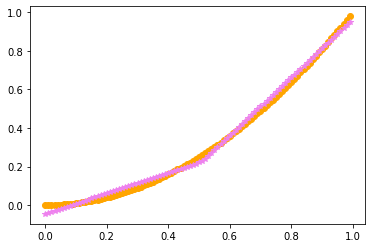

In [16]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', color='orange')
plt.plot(x, pred_y, '*', color='violet')
plt.show()